# Tidy Data- Project 3
### DAV 5400 Spring 2019 Week 10 
__Maayan Raviv__
***


## Data Set 1
Data set provided by: 
<br>
__Qi Sun:__ Student enrollment data for different institutions in the academic year of 2016/2017
<br>
<br>
__First Step:__ Insert the raw data into CSV file and read from GitHub.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

CSV_file_source = "https://raw.githubusercontent.com/maayan3007/DAV-5400/master/data1-P3.csv"
data = pd.read_csv(CSV_file_source)
data.head()

,Unique ID of the institution,Level of student,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,White,Two or more races,Race/ethnicity unknown,Nonresident alien
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,23,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0


__Second Step:__ Converting the raw data to a "tidy", long format.

In [3]:
# Let's make the dataset long(tidy)
# In order to use pandas wide_to_long function in pandas version below 0.24 column names should be following format
# name-number
# hence let's rename columns first
columns = {
    "American Indian or Alaska Native": "Count1",
    "Asian": "Count2",
    "Black or African American": "Count3",
    "Hispanic or Latino": "Count4",
    "Native Hawaiian or Other Pacific Islander": "Count5",
    "White": "Count6",
    "Two or more races": "Count7",
    "Race/ethnicity unknown": "Count8",
    "Nonresident alien": "Count9"
          }
data = data.rename(columns=columns)
data.head()

,Unique ID of the institution,Level of student,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,23,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0


In [4]:
# futher reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
data["id"] = data.index # add index column
data = pd.wide_to_long(data, ["Count"], i="id", j="Ethnicity")
data.head()


,,Level of student,Unique ID of the institution,Count
id,Ethnicity,,,
0,1,Undergraduate,100654,11
1,1,Graduate,100654,4
2,1,Undergraduate,100663,36
3,1,Graduate,100663,23
4,1,Undergraduate,100690,0


In [5]:
# Let's remove indexing and make ethnicity back to string values
data_long = data.copy()
data_long = data_long.reset_index()
data_long = data_long.drop(['id'], axis=1)

# Make ethnicity back to string values
mapper = {
    1: "American Indian or Alaska Native",
    2: "Asian",
    3: "Black or African American",
    4: "Hispanic or Latino",
    5: "Native Hawaiian or Other Pacific Islander",
    6: "White",
    7: "Two or more races",
    8: "Race/ethnicity unknown",
    9: "Nonresident alien"
}

data_long['Ethnicity'] = data_long['Ethnicity'].map(mapper)
data_long.head()

,Ethnicity,Level of student,Unique ID of the institution,Count
0,American Indian or Alaska Native,Undergraduate,100654,11
1,American Indian or Alaska Native,Graduate,100654,4
2,American Indian or Alaska Native,Undergraduate,100663,36
3,American Indian or Alaska Native,Graduate,100663,23
4,American Indian or Alaska Native,Undergraduate,100690,0


__Third Step:__ Perform Analysis
<br>
### Number of Enrollments by Ethnicity
According to the bar chart we can tell that most of the enrollments are white.

                                   Ethnicity  Count
8                                      White  20972
2                  Black or African American  12112
5                          Nonresident alien   1676
1                                      Asian   1615
6                     Race/ethnicity unknown   1363
3                         Hispanic or Latino   1225
7                          Two or more races   1164
0           American Indian or Alaska Native    189
4  Native Hawaiian or Other Pacific Islander     34


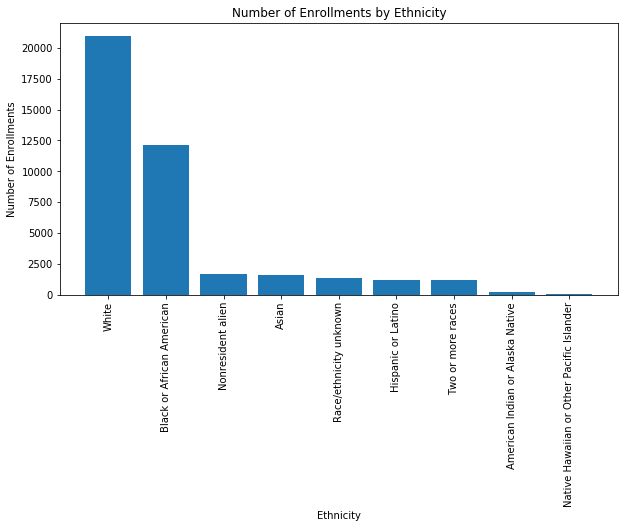

In [6]:
# Groupby 'Ethinicity' and aggregate records of each group on 'Count' column with sum aggregate function. Then sort the dataframe on 'Count' in decending order
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Ethnicity'], as_index=False).agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)

print(data_long_copy)

# Bar chart
names = list(data_long_copy['Ethnicity'])
values = list(data_long_copy['Count'])

plt.figure(figsize=(10,5))
plt.bar(names, values)
plt.title('Number of Enrollments by Ethnicity')
plt.xticks(names, rotation='vertical')
plt.ylabel('Number of Enrollments')
plt.xlabel('Ethnicity')
plt.show()

### Number of Enrollments per Institution
According to the bar chart we can tell that most of the enrollments enrolled to institution 100663


   Unique ID of the institution  Count
1                        100663  23193
3                        100706   9897
0                        100654   6392
2                        100690    868


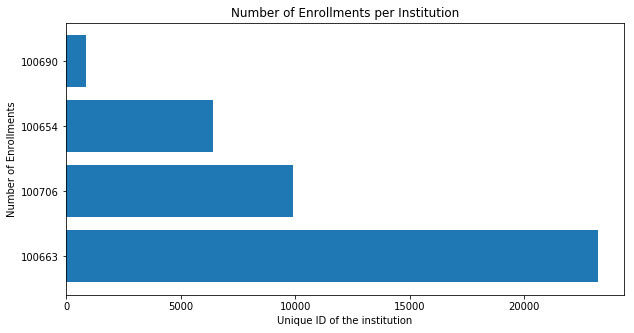

In [7]:
# Groupby 'Unique ID of the institution' and aggregate records of each group on 'Count' column with sum aggregate function. Then sort the dataframe on 'Count' in decending order
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Unique ID of the institution'], as_index=False).agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)

print(data_long_copy)

# Bar chart
names = [str(i) for i in data_long_copy['Unique ID of the institution']]
values = list(data_long_copy['Count'])

plt.figure(figsize=(10,5))
plt.barh(names, values)
plt.title('Number of Enrollments per Institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Unique ID of the institution')
plt.show()

### Number of Enrolments by School Level
According to the bar chart we can tell that most of the enrollments enrolled to undergrad school.

  Level of student  Count
1    Undergraduate  26465
0         Graduate  13885


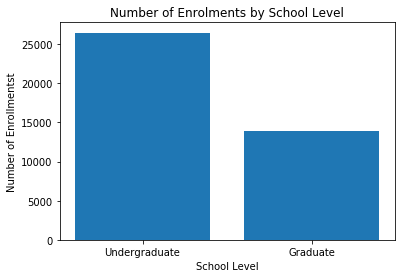

In [8]:
# Groupby 'Unique ID of the institution' and aggregate records of each group on 'Count' column with sum aggregate function. Then sort the dataframe on 'Count' in decending order
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Level of student'], as_index=False).agg({'Count': 'sum'}).sort_values(by='Count', ascending=False)

print(data_long_copy)

# Bar chart
names = [str(i) for i in data_long_copy['Level of student']]
values = list(data_long_copy['Count'])

plt.bar(names, values)
plt.title('Number of Enrolments by School Level')
plt.ylabel('Number of Enrollmentst')
plt.xlabel('School Level')
plt.show()

## Data Set 2
Data set provided by: 
<br>
__Jeeho Bae:__ User Review Data 
<br>
<br>
__First Step:__ Insert the raw data into CSV file and read from GitHub.

In [26]:
# Reading the second dataset
CSV_file_source = "https://raw.githubusercontent.com/maayan3007/DAV-5400/master/data2-P3.csv"
data = pd.read_csv(CSV_file_source, index_col=0)
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,user 1,2,77,79,69,68,95
1,user 2,2,62,76,76,69,68
2,user 3,2,50,97,87,50,75
3,user 4,2,68,77,95,76,61
4,user 5,2,98,54,59,95,86


__Second Step:__ Converting the raw data to a "tidy", long format.

In [27]:
# Let's make the dataset long(tidy)
# In order to use pandas wide_to_long function in pandas version below 0.24 column names should be following format
# name-number
# hence let's rename columns first
columns = {
    "Sports": "Number of reviews1",
    "Religious": "Number of reviews2",
    "Nature": "Number of reviews3",
    "Theatre": "Number of reviews4",
    "Shopping": "Number of reviews5",
    "Picnic": "Number of reviews6",
          }
data = data.rename(columns=columns)
data.head()

,User Id,Number of reviews1,Number of reviews2,Number of reviews3,Number of reviews4,Number of reviews5,Number of reviews6
0,user 1,2,77,79,69,68,95
1,user 2,2,62,76,76,69,68
2,user 3,2,50,97,87,50,75
3,user 4,2,68,77,95,76,61
4,user 5,2,98,54,59,95,86


In [28]:
# futher reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
data["id"] = data.index # add index column
data = pd.wide_to_long(data, ["Number of reviews"], i="id", j="Category")
data.head()

,,User Id,Number of reviews
id,Category,,
0,1,user 1,2
1,1,user 2,2
2,1,user 3,2
3,1,user 4,2
4,1,user 5,2


In [29]:
# Let's remove indexing and make Category back to string values
data_long = data.copy()
data_long = data_long.reset_index()
data_long = data_long.drop(['id'], axis=1)

# Make Category back to string values
mapper = {
    1: "Sports",
    2: "Religious",
    3: "Nature",
    4: "Theatre",
    5: "Shopping",
    6: "Picnic",
}

data_long['Category'] = data_long['Category'].map(mapper)
data_long.head()

,Category,User Id,Number of reviews
0,Sports,user 1,2
1,Sports,user 2,2
2,Sports,user 3,2
3,Sports,user 4,2
4,Sports,user 5,2


__Third Step:__ Perform Analysis
<br>
### Number of Reviews Per Category
According to the bar chart most reviews where given to the Theatre category. However, most categories has similar number of reviews beside Sport Category with only 10 reviews. 

    Category  Number of reviews
5    Theatre                386
1     Picnic                385
0     Nature                383
3   Shopping                358
2  Religious                355
4     Sports                 10


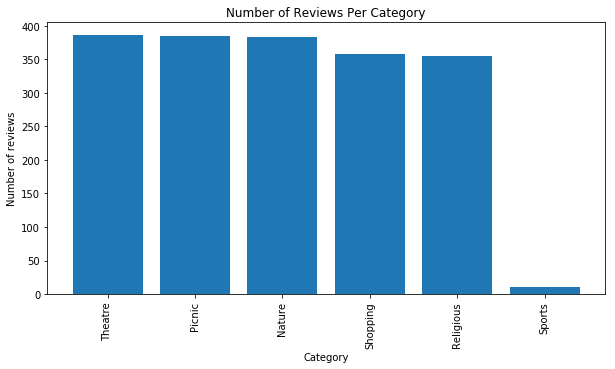

In [35]:
# Groupby 'Category' and aggregate records of each group on 'Number of reviews' column with sum aggregate function.
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Category'], as_index=False).agg({'Number of reviews': 'sum'}).sort_values(by='Number of reviews',ascending=False)

print(data_long_copy)

# Bar chart
names = list(data_long_copy['Category'])
values = list(data_long_copy['Number of reviews'])

plt.figure(figsize=(10,5))
plt.bar(names, values)
plt.title('Number of Reviews Per Category')
plt.xticks(names, rotation='vertical')
plt.ylabel('Number of reviews')
plt.xlabel('Category')
plt.show()

### Box Plot Per Category
* The Median of most boxplots is similiar beside sports category.  
* Sport's and Nature's box plots are comparatively short, meaning that most reviwers reviewed the same number of reviews for those categories.
* Picnic's and Theatre's box plot's are comparatively tall, meaning that the number of reviews per category was different among the reviewers. 
* Sport's box plot is much lower than the others, meaning there is a difference between this category to the others which can be emphsized by the low number of reviews for this category.

          Number of reviews                                               
                      count  mean        std   min   25%   50%   75%   max
Category                                                                  
Nature                  5.0  76.6  15.274161  54.0  76.0  77.0  79.0  97.0
Picnic                  5.0  77.0  13.656500  61.0  68.0  75.0  86.0  95.0
Religious               5.0  71.0  18.000000  50.0  62.0  68.0  77.0  98.0
Shopping                5.0  71.6  16.226522  50.0  68.0  69.0  76.0  95.0
Sports                  5.0   2.0   0.000000   2.0   2.0   2.0   2.0   2.0
Theatre                 5.0  77.2  14.254824  59.0  69.0  76.0  87.0  95.0


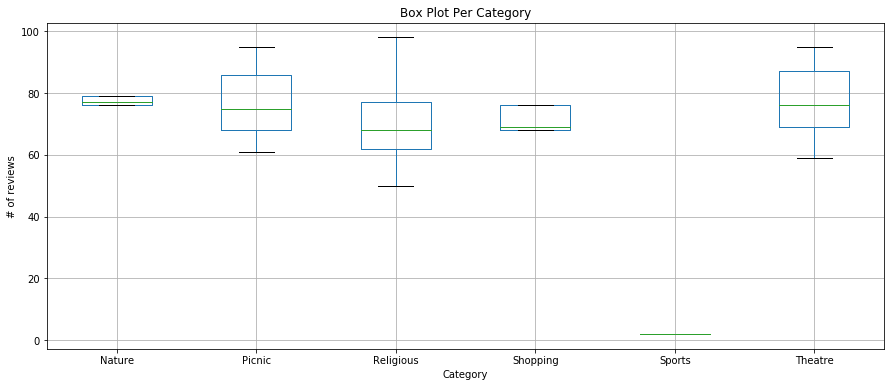

In [37]:
# Groupby 'Category'
data_long_copy = data_long.copy()
data_groupby = data_long_copy.groupby(['Category'])

print(data_groupby.describe())

axes = data_groupby.boxplot(subplots=False, figsize=(15, 6), showfliers=False) # draw boxplot based on groups
axes.set_title("Box Plot Per Category")
axes.set_ylabel("# of reviews")
axes.set_xlabel("Category")
axes.set_xticklabels(list(data_groupby.groups.keys()))
plt.show()

## Data Set 3
Data set provided by: 
<br>
__Natan Bienstock:__ Student Test Data 
<br>
<br>
__First Step:__ Insert the raw data into CSV file and read from GitHub.

In [38]:
# Reading the third dataset
CSV_file_source = "https://raw.githubusercontent.com/maayan3007/DAV-5400/master/data3-P3.csv"
data = pd.read_csv(CSV_file_source)
data.head()

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,NaN,86
3,Charles Barkey,NaN,89,NaN,76
4,Kenny Smith,80.0,81,79.0,85


__Second Step:__ Converting the raw data to a "tidy", long format.

In [39]:
# Let's make the dataset long(tidy)
data["id"] = data.index # add index column
data = pd.wide_to_long(data, ["Test "], i="id", j="Test")
data.head()

,,Name,Test
id,Test,,
0,1,Reggie Miller,97.0
1,1,Dan Bonner,76.0
2,1,Steve Smith,84.0
3,1,Charles Barkey,NaN
4,1,Kenny Smith,80.0


In [40]:
# Let's remove indexing
data_long = data.copy()
data_long = data_long.reset_index()
data_long = data_long.drop(['id'], axis=1)

# Rename test to marks
data_long = data_long.rename(columns={'Test ': 'Marks'})
data_long.head()

,Test,Name,Marks
0,1,Reggie Miller,97.0
1,1,Dan Bonner,76.0
2,1,Steve Smith,84.0
3,1,Charles Barkey,NaN
4,1,Kenny Smith,80.0


__Third Step:__ Perform Analysis
<br>
### Highest Average Mark Holder
The highest average mark holder is Jim Jackson with average mark of 93.0. 


In [44]:
# Groupby 'Name' and aggregate records of each group on 'Marks' column with mean aggregate function.
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Name'], as_index=False).agg({'Marks': 'mean'}).sort_values(by='Marks', ascending=False)

# Rename marks to average marks
data_long_copy = data_long_copy.rename(columns={'Marks': 'Average Marks'})

print(data_long_copy)

print("\nHighest average mark holder is " + data_long_copy['Name'].iloc[0])

             Name  Average Marks
4     Jim Jackson      93.000000
6   Reggie Miller      88.750000
3      Jalen Rose      83.000000
0  Charles Barkey      82.500000
7     Steve Smith      81.666667
5     Kenny Smith      81.250000
1    Chris Webber      79.500000
2      Dan Bonner      76.250000

Highest average mark holder is Jim Jackson


### Range of Scores per Name
Chris Webber and Reggie Miller hold the highest range of score, 17 points. While Jim Jackson holds the lowest range with only 4 points when he is also the highest average mark holder. 

             Name Marks        diff
                    max   min      
1    Chris Webber  92.0  75.0  17.0
6   Reggie Miller  97.0  80.0  17.0
0  Charles Barkey  89.0  76.0  13.0
2      Dan Bonner  81.0  68.0  13.0
7     Steve Smith  86.0  75.0  11.0
5     Kenny Smith  85.0  79.0   6.0
3      Jalen Rose  85.0  80.0   5.0
4     Jim Jackson  95.0  91.0   4.0


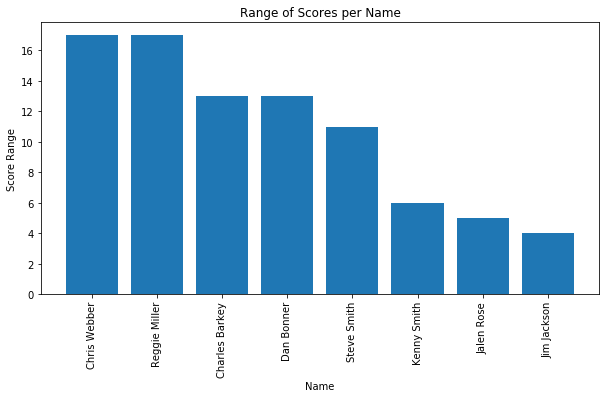

In [45]:
# Question 2 : Greatest range of test grades
# Groupby 'Name' and aggregate records of each group on 'Marks' column with max, min aggregate function.
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Name'], as_index=False).agg({'Marks': ['max', 'min']})

# Calculate difference between max and min
data_long_copy['diff'] = data_long_copy.apply(lambda x: x['Marks']['max']-x['Marks']['min'], axis=1)

# Sort the dataset on diff decending order
data_long_copy = data_long_copy.sort_values(by='diff', ascending=False)
print(data_long_copy)

# Bar chart
names = list(data_long_copy['Name'])
values = list(data_long_copy['diff'])

plt.figure(figsize=(10,5))
plt.bar(names, values)
plt.title('Range of Scores per Name')
plt.xticks(names, rotation='vertical')
plt.ylabel('Score Range')
plt.xlabel('Name')
plt.show()

### Test Grades
Test number 4 has the highest average mark score, while most test averages are similar. 

   Test  Average Marks
3     4      86.125000
0     1      83.428571
2     3      83.333333
1     2      80.500000


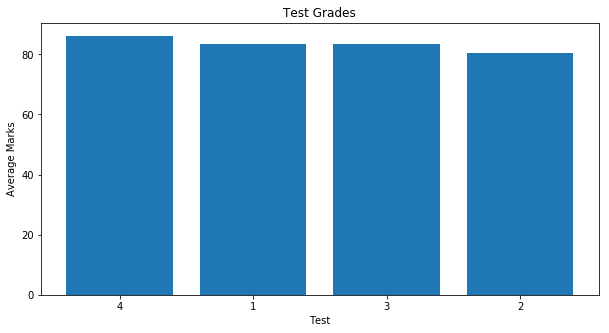


Highest average holds for test 4


In [46]:
# Groupby 'Test' and aggregate records of each group on 'Marks' column with max, mean aggregate function.
data_long_copy = data_long.copy()
data_long_copy = data_long_copy.groupby(['Test'], as_index=False).agg({'Marks': 'mean'}).sort_values(by='Marks', ascending=False)
data_long_copy = data_long_copy.rename(columns={'Marks': 'Average Marks'})

print(data_long_copy)

# Bar chart
names = [str(i) for i in data_long_copy['Test']]
values = list(data_long_copy['Average Marks'])

plt.figure(figsize=(10,5))
plt.bar(names, values)
plt.title('Test Grades')
# plt.xticks(names, rotation='vertical')
plt.ylabel('Average Marks')
plt.xlabel('Test')
plt.show()

print("\nHighest average holds for test " + str(data_long_copy['Test'].iloc[0]))